In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
# dataset_train = pd.read_csv('ADANIENT_NS_train.csv')
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)

dataset_train.to_csv('CSV.csv', index=False)

training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [102]:
dataset_train.shape

(2035, 8)

In [103]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [104]:
dataset_train.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [112]:
# dataset_train['Open'].fillna(value=dataset_train['Open'].mean(), inplace=True)
# dataset_train['High'].fillna(value=dataset_train['High'].mean(), inplace=True)
# dataset_train['Low'].fillna(value=dataset_train['Low'].mean(), inplace=True)
# dataset_train['Close'].fillna(value=dataset_train['Close'].mean(), inplace=True)
# dataset_train['Adj_Close'].fillna(value=dataset_train['Adj_Close'].mean(), inplace=True)
# dataset_train['Volume'].fillna(value=dataset_train['Volume'].mean(), inplace=True)
# print(dataset_train.isnull().sum())

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [110]:
# training_set = dataset_train.iloc[:, 1:2].values # "Open" Column

# print(training_set)
# print('\n', training_set.shape)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]

 (2035, 1)


In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_set = scaler.fit_transform(training_set)
print(scaled_training_set)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [115]:
x_train = []
y_train = []

for i in range(60, 2035):
    x = scaled_training_set[i-60:i, 0]
    x_train.append(x)
    
    y = scaled_training_set[i, 0]
    y_train.append(y)

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(1975, 60) (1975,)


In [116]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1975, 60, 1)


In [118]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs=5, batch_size=2)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
62/62 [==============================] - 9s 61ms/step - loss: 0.0079
Epoch 2/10
62/62 [==============================] - 4s 67ms/step - loss: 0.0030
Epoch 3/10
62/62 [==============================] - 5s 77ms/step - loss: 0.0030
Epoch 4/10
62/62 [==============================] - 4s 64ms/step - loss: 0.0026
Epoch 5/10
62/62 [==============================] - 4s 64ms/step - loss: 0.0024
Epoch 6/10
62/62 [==============================] - 4s 58ms/step - loss: 0.0021
Epoch 7/10
62/62 [==============================] - 4s 59ms/step - loss: 0.0023
Epoch 8/10
62/62 [==============================] - 3s 56ms/step - loss: 0.0020
Epoch 9/10
62/62 [==============================] - 4s 58ms/step - loss: 0.0021
Epoch 10/10
62/62 [==============================] - 4s 57ms/step - loss: 0.0017


In [134]:
# dataset_test = pd.read_csv('ADANIENT_NS_test.csv')
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
actual_stock_price = dataset_test.iloc[:, 1:2].values
print(actual_stock_price)


[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [136]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# print(x_test)

predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price[0])

1/1 [==============================] - 0s 38ms/step
[118.510895]


/tmp/ipykernel_11792/3104929813.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


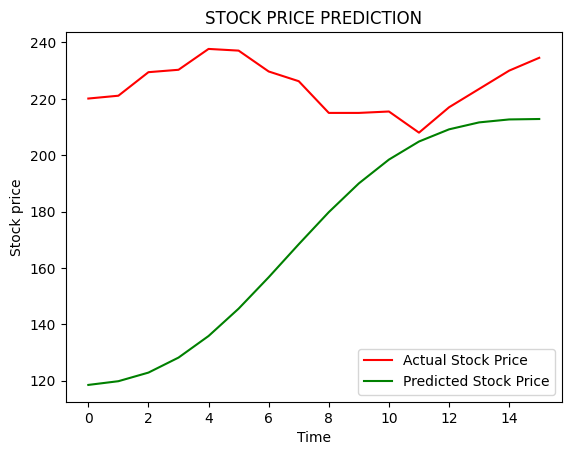

In [139]:
plt.plot(actual_stock_price, color='red', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Stock Price')
plt.title('STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()